Question 1

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
img = cv2.imread('C:/Users/minim/Downloads/einstein.jpg')

In [3]:
def display(img,cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

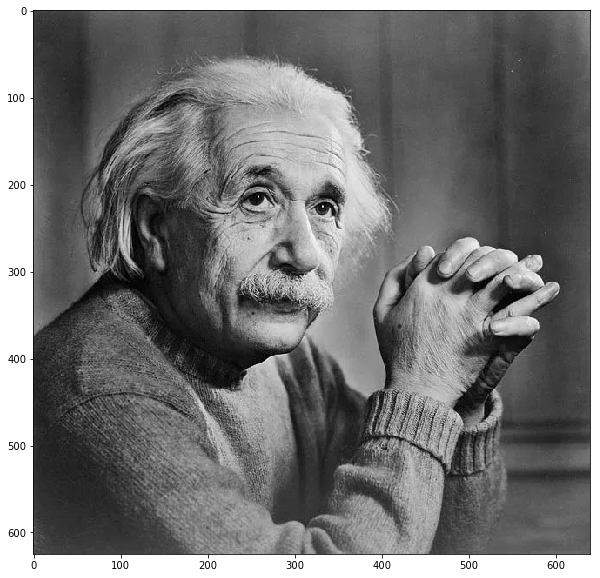

In [4]:
display(img)

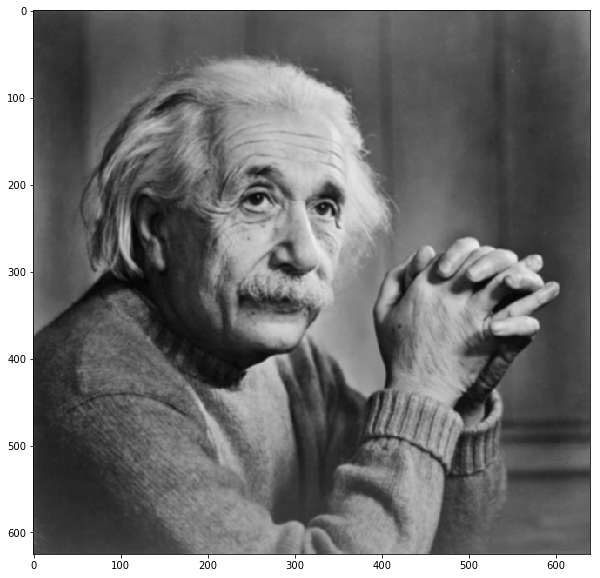

In [5]:
display(cv2.GaussianBlur(img,(5,5),0))

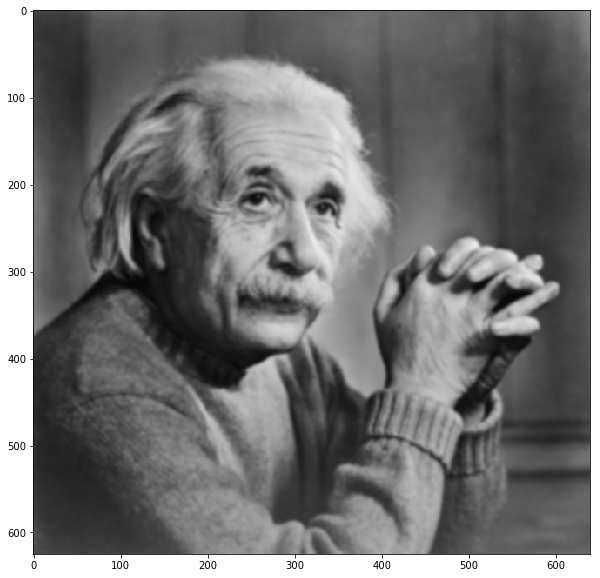

In [6]:
display(cv2.GaussianBlur(img,(9,9),0))

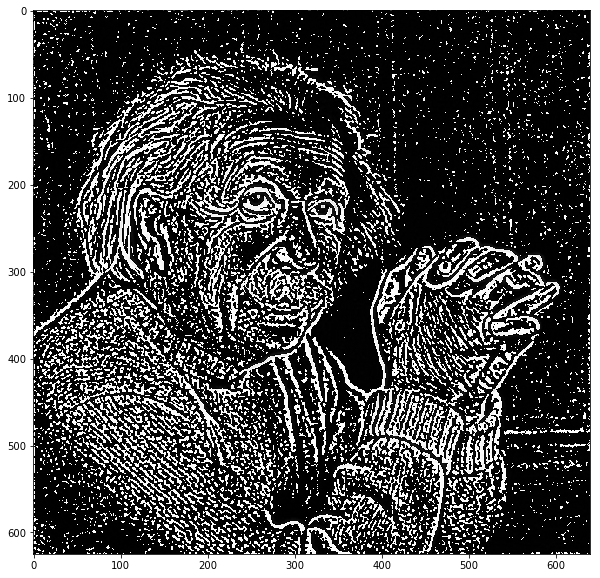

In [7]:
display(cv2.GaussianBlur(img,(9,9),0)-cv2.GaussianBlur(img,(5,5),0))

Question 2

In [8]:
barrel = cv2.imread('C:/Users/minim/Downloads/barrel_cropped.jpg')

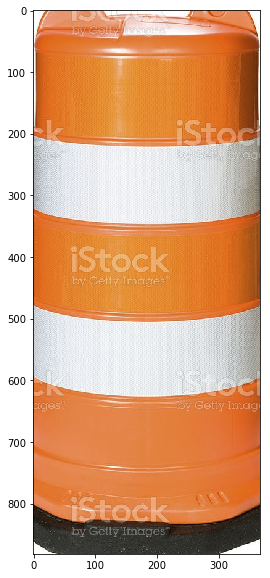

In [9]:
barrel = cv2.cvtColor(barrel,cv2.COLOR_BGR2RGB)

display(barrel)

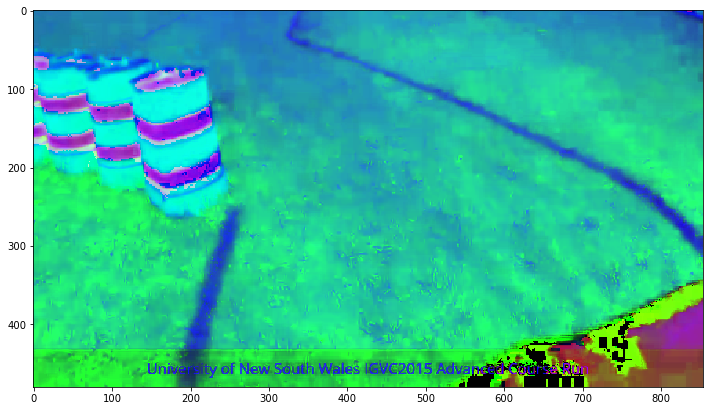

In [10]:
video = cv2.VideoCapture('C:/Users/minim/Downloads/barrel.mp4')
video.set(cv2.CAP_PROP_POS_MSEC, 11500)


ret,frame = video.read()
frame = cv2.cvtColor(frame,cv2.COLOR_BGR2HSV)
display(frame)

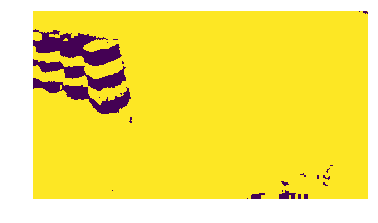

In [18]:
hist = cv2.calcHist([barrel],[0],None,[180],[0,180])

norm = cv2.normalize(hist, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)

_, norm = cv2.threshold(norm, 5, 255, cv2.THRESH_BINARY)
res = cv2.calcBackProject([frame], [0], norm, [0, 180], 1)
disc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
plt.axis('off')
plt.imshow(cv2.filter2D(res, -1, disc, res))



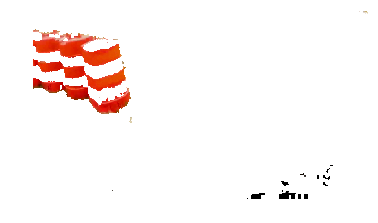

In [19]:
final = cv2.merge((res, res, res))
plt.axis('off')
plt.imshow(cv2.bitwise_or(cv2.cvtColor(frame, cv2.COLOR_HSV2RGB), final))